# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Raden Dika Natakusumah
- **Email:** kenasyah12@gmail.com
- **ID Dicoding:** dika1804

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata waktu pengiriman produk dari waktu pemesanan hingga waktu diterima oleh pelanggan?
- Produk apa yang paling banyak dibeli dalam kategori tertentu selama periode tertentu?
- Berapa banyak pengeluaran yang dilakukan pelanggan dalam beberapa bulan terakhir? 
- Bagaimana demografi dari pelanggan?

## Import Semua Packages/Library yang Digunakan

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [76]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [77]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [78]:
orderitems_df = pd.read_csv('order_items_dataset.csv')
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [79]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Mengumpulkan data yang akan digunakan
- Mengetahui isi data yang telah diinisialisasi
- Mengetahui data apa saja yang diperlukan

### Assessing Data

### Menilai data products_df

In [80]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [81]:
print("Jumlah data hilang :  ")
products_df.isna().sum()

Jumlah data hilang :  


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [82]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [83]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- terdapat missing value pada beberapa data yang terdapat pada dataframe products
- tidak ada duplikasi data pada dataframe products
- Tipe data sesuai
- Accurate Value

### Menilai data orders_df

In [84]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [85]:
print("Jumlah data hilang :")
orders_df.isna().sum()

Jumlah data hilang :


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [86]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [87]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat missing value pada beberapa kolom
- Dalam tipe data yang terdapat pada dataframe menunjukkan bahwa kolom order dari index 3 sampai dengan 7 memiliki tipe data yang tidak sesuai yang seharusnya bertipe datetime.
- Tidak ada duplikasi data

### Menilai data orderitems_df

In [88]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [89]:
print('Jumlah data yang hilang :')
orderitems_df.isna().sum()

Jumlah data yang hilang :


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [90]:
print ("Jumlah data yang duplikasi : ", orderitems_df.duplicated().sum())

Jumlah data yang duplikasi :  0


In [91]:
orderitems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Terdapat beberapa tipe data yang tidak sesuai
- Tidak ada duplikasi data
- Tidak ada missing value

### Menilai data customers_df

In [92]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [93]:
print("Jumlah data yang hilang : ")
customers_df.isna().sum()

Jumlah data yang hilang : 


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [94]:
print("Jumlah duplikasi data : ", customers_df.duplicated().sum())

Jumlah duplikasi data :  0


In [95]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Tidak ada duplikasi data & Missing value
- Data sudah baik

### Cleaning Data

### Cleaning Data Products_df

In [96]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [97]:
mode_productkategori = products_df['product_category_name'].mode()[0]

In [98]:
products_df['product_category_name'].fillna(mode_productkategori, inplace=True)

In [99]:
products_name = products_df['product_name_lenght'].mean()
products_desc = products_df['product_description_lenght'].mean()
products_photos = products_df['product_photos_qty'].mean()

In [100]:
products_df['product_name_lenght'].fillna(products_name, inplace=True)
products_df['product_description_lenght'].fillna(products_desc, inplace=True)
products_df['product_photos_qty'].fillna(products_photos, inplace=True)

In [101]:
products_df.fillna({
    'product_weight_g' : products_df['product_weight_g'].median(),
    'product_length_cm' : products_df['product_length_cm'].median(),
    'product_height_cm' : products_df['product_height_cm'].median(),
    'product_width_cm' : products_df['product_width_cm'].median()
}, inplace=True)

In [102]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Mengisi missing value seperti category_name dengan nilai mode/modus
- Mengisi missing value produc_name_length, product_description_lenght, product_photos_qty dengan imputation mean
- mengisi missing value product_weight_g, product_length_cm, product_height_cm, product_width_cm dengan imputation median karena jumlah missing value yang berjumlah 2

### Cleaning Data orders_df

In [103]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for columns in datetime_columns:
    orders_df[columns] = pd.to_datetime(orders_df[columns])

In [104]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [105]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [106]:
orders_df.sort_values(by=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'],
                    ascending=[True, True, True, True, True], 
                    inplace=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25
...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12


In [107]:
orders_df['order_approved_at'].interpolate(method='linear', limit_direction='forward', inplace=True)
orders_df['order_delivered_carrier_date'].interpolate(method='linear', limit_direction='forward', inplace=True)
orders_df['order_delivered_customer_date'].interpolate(method='linear', limit_direction='forward', inplace=True)

In [108]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- Mengubah tipe data dari object(string) menjadi datettimee
- Mengisi missing value datetime menggunakan interpolation

### Cleaning Data orderitems_df

In [109]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [110]:
datetime_column = ['shipping_limit_date']

for column in datetime_column:
    orderitems_df[column] = pd.to_datetime(orderitems_df[column])

In [111]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- Mengubah tipe data shipping_limit_date menjadi datetime

## Insight Overall

- Untuk data pada customers_df tidak ada perubahan karena tidak ada duplikasi data, tipe data yang tidak sesuai, missing value dan lainnya.

## Exploratory Data Analysis (EDA)

### Explore Data Customers

In [112]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [113]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [114]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

**Insight Data Customers:**
- Mengelompokkan berdasarkan kolom customer city dengan value yang sama sehingga dapat diketahui bahwa sebaran pelanggan paling banyak berasal dari sao paulo, rio de janeiro, belo horizonte.

### Explore Data orders_df

In [115]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [116]:
delivery_time = orders_df['order_delivered_customer_date']- orders_df['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x:x.total_seconds())
orders_df['delivery_time'] = round(delivery_time/86400)

In [117]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [118]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441.000000
mean,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232,14.166209
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-529.000000
25%,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00,7.000000
50%,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00,10.000000
75%,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00,16.000000
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,649.000000
std,NaN,NaN,NaN,NaN,NaN,36.751958


In [119]:
# Hitung Q1, Q3, dan IQR
Q1 = orders_df['delivery_time'].quantile(0.25)
Q3 = orders_df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

orders_df = orders_df[(orders_df['delivery_time'] >= lower_bound) & (orders_df['delivery_time'] <= upper_bound)]


In [120]:
median_value = orders_df[orders_df['delivery_time'] >= 0]['delivery_time'].median()
orders_df['delivery_time'] = orders_df['delivery_time'].apply(lambda x: median_value if x < 0 else x)


In [121]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,91940,91940,91940,91940,91940,91940,91940,91940,91940.000000
unique,91940,91940,6,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,91733,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-02 11:21:30.769773824,2018-01-02 22:54:03.000837376,2018-01-05 11:43:21.570303232,2018-01-13 13:16:41.838486272,2018-01-25 21:23:43.241244160,11.043637
min,NaN,NaN,NaN,2016-10-03 09:44:50,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-27 00:00:00,-0.000000
25%,NaN,NaN,NaN,2017-09-12 07:51:07,2017-09-12 15:02:55.500000,2017-09-14 17:21:35.249999872,2017-09-21 19:38:52.500000,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-20 12:24:31.500000,2018-01-20 18:30:48,2018-01-23 22:26:50.500000,2018-01-31 23:54:37,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-08 18:52:01.249999872,2018-05-09 03:11:36.500000,2018-05-10 15:19:00,2018-05-17 18:47:34.500000,2018-05-29 00:00:00,15.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-31 15:25:00,2018-09-11 00:37:34,2018-10-25 00:00:00,29.000000


**Insight Data Orders:**
- Mencari tahu durasi produk diterima mulai dari purchase product hingga diterima pelanggan.
- Terjadi outllier pada data dikarenakan ada status yang dicancel sehingga perlu dilakukkan penghilangan outlier agar data menjadi logis.
- Menggunakan IQR dan median untuk menghilangkan outlier

### Explore Data products_df dan order_items_df

In [122]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.376802,30.814725,16.937422,23.196534
std,10.150458,629.208849,1.720614,4281.926387,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [123]:
orderitems_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [124]:
orderproduct_df = pd.merge(
    left=orderitems_df,
    right=products_df[['product_id', 'product_category_name']],
    how='inner',
    on='product_id'
)

orderproduct_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff
...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer


In [125]:
#Periode 2017-2018
start_date = "2017-01-01"
end_date = "2018-12-31"

filtered_df = orderproduct_df[
    (orderproduct_df['shipping_limit_date'] >= start_date)&
    (orderproduct_df['shipping_limit_date'] <= end_date)
]

In [126]:
top_products_seller_per_category = filtered_df.groupby(['product_category_name', 'product_id']).size()\
    .reset_index(name='count')\
    .sort_values(by=["product_category_name", "count"],ascending=[True, False])

top_10_products = top_products_seller_per_category.sort_values(by="count", ascending=False).head(10)
top_10_products

,product_category_name,product_id,count
23906,moveis_decoracao,aca2eb7d00ea1a7b8ebd4e68314663af,527
9379,cama_mesa_banho,99a4788cb24856965c36a24e339b6058,488
18638,ferramentas_jardim,422879e10f46682990de24d770e7f83d,484
18607,ferramentas_jardim,389d119b48cf3043d311335e499d9c6b,392
18595,ferramentas_jardim,368c6c730842d78016ad823897a372db,388
18700,ferramentas_jardim,53759a2ecddad2bb87a079a1f1519f73,373
20592,informatica_acessorios,d1c427060a0f73f6b889a5c7c61f2ac4,343
28231,relogios_presentes,53b36df67ebb7c41585e8d54d6772e08,323
3570,beleza_saude,154e7e31ebfa092203795c972e5804a6,281
19673,informatica_acessorios,3dd2a17168ec895c781a9191c1e95ad7,274


**Insight Data products & data order_items:**
- Menggabungkan dua dataset untuk memperoleh produk yang paling diminati.
- Mengetahui produk mana yang paling banyak dibeli berdasarkan kategori yang ada.
- Produk dengan kategori nama agro industria e comercio merupakan produk dengan pembelian terbanyak pada periode 2017-2018

In [127]:
orders_customer_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='inner',
    on='customer_id'
)
orders_customer_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91935,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
91936,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
91937,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
91938,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [128]:
all_df = pd.merge(
    left=orders_customer_df,
    right=orderproduct_df,
    how='inner',
    on='order_id'
)
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105129,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes
105130,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,eletrodomesticos_2
105131,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios
105132,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata waktu pengiriman produk dari waktu pemesanan hingga waktu diterima oleh pelanggan?

In [129]:
all_df["shipping_month"] = all_df["shipping_limit_date"].dt.strftime('%B')
all_df["shipping_year"] = all_df["shipping_limit_date"].dt.year
monthly_delivery_time = all_df.groupby(["shipping_year", "shipping_month"])["delivery_time"].mean().reset_index()

In [130]:
month_order = ["January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December"]
monthly_delivery_time["shipping_month"] = pd.Categorical(monthly_delivery_time["shipping_month"], categories=month_order, ordered=True)
monthly_delivery_time = monthly_delivery_time.sort_values(["shipping_year", "shipping_month"])

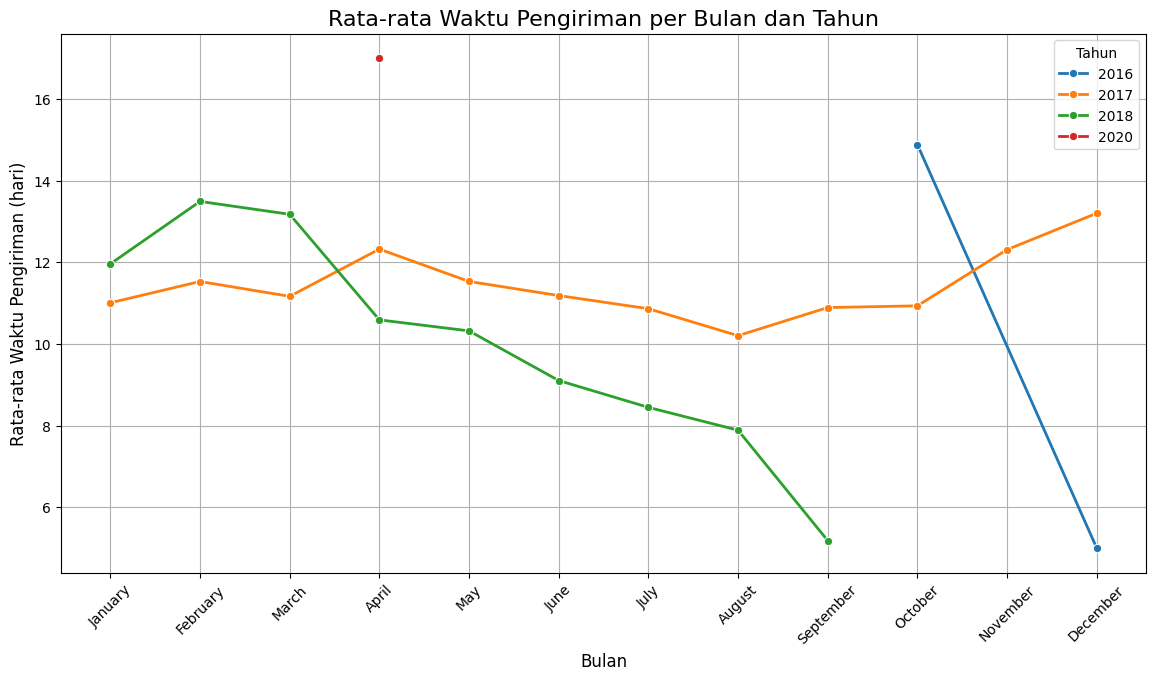

In [131]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    x="shipping_month", 
    y="delivery_time", 
    hue="shipping_year", 
    data=monthly_delivery_time,
    marker="o",
    linewidth=2,
    palette="tab10"
)

plt.title("Rata-rata Waktu Pengiriman per Bulan dan Tahun", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Rata-rata Waktu Pengiriman (hari)", fontsize=12)
plt.xticks(rotation=45) 
plt.legend(title="Tahun") 
plt.grid(True)

### Pertanyaan 2: Produk apa yang paling banyak dibeli dalam kategori tertentu selama periode 2017-2018?

C:\Users\RADEN DIKA.N\AppData\Local\Temp\ipykernel_20664\3472882743.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\RADEN DIKA.N\AppData\Local\Temp\ipykernel_20664\3472882743.py:4: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(


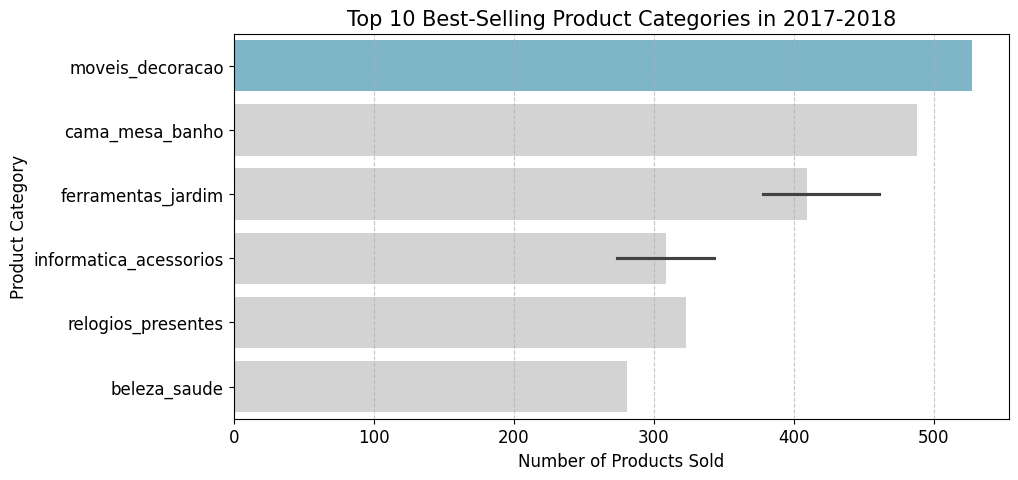

In [132]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="product_category_name", 
    x="count",
    data=top_10_products,
    palette=colors
)
plt.title("Top 10 Best-Selling Product Categories in 2017-2018", loc="center", fontsize=15)
plt.xlabel("Number of Products Sold", fontsize=12)  # Label sumbu X
plt.ylabel("Product Category", fontsize=12)  # Label sumbu Y
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7) 
plt.show()

### Pertanyaan 3: Berapa banyak pengeluaran yang dilakukan pelanggan dalam beberapa bulan terakhir? 


In [133]:
latest_date = all_df['order_purchase_timestamp'].max()
months = 3
cutoff_date = latest_date - pd.DateOffset(months=months)
recent_transactions = all_df[all_df["order_purchase_timestamp"] >= cutoff_date]
recent_revenue = recent_transactions.groupby("customer_unique_id")["price"].sum().reset_index()
recent_revenue = recent_revenue.sort_values(by="price", ascending=False)

recent_revenue.head(10)

,customer_unique_id,price
8557,763c8b1c9c68a0229c42c9fc6f662b93,7160.00
4999,459bef486812aa25204be022145caa62,6729.00
5264,48e1ac109decbb87765a3eade6854098,4590.00
11729,a229eba70ec1c2abef51f04987deb7a5,4400.00
17264,edde2314c6c30e864a128ac95d6b2112,4399.87
14499,c8460e4251689ba205045f3ea17884a1,4080.00
14641,ca27f3dac28fb1063faddd424c9d95fa,4059.00
6387,58483a1c055dfb600f57c5b867174542,3899.00
11198,9b11e010850a4045d2da80c7783fdbd1,3198.00
5055,46450c74a0d8c5ca9395da1daac6c120,3109.99


C:\Users\RADEN DIKA.N\AppData\Local\Temp\ipykernel_20664\2212236404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


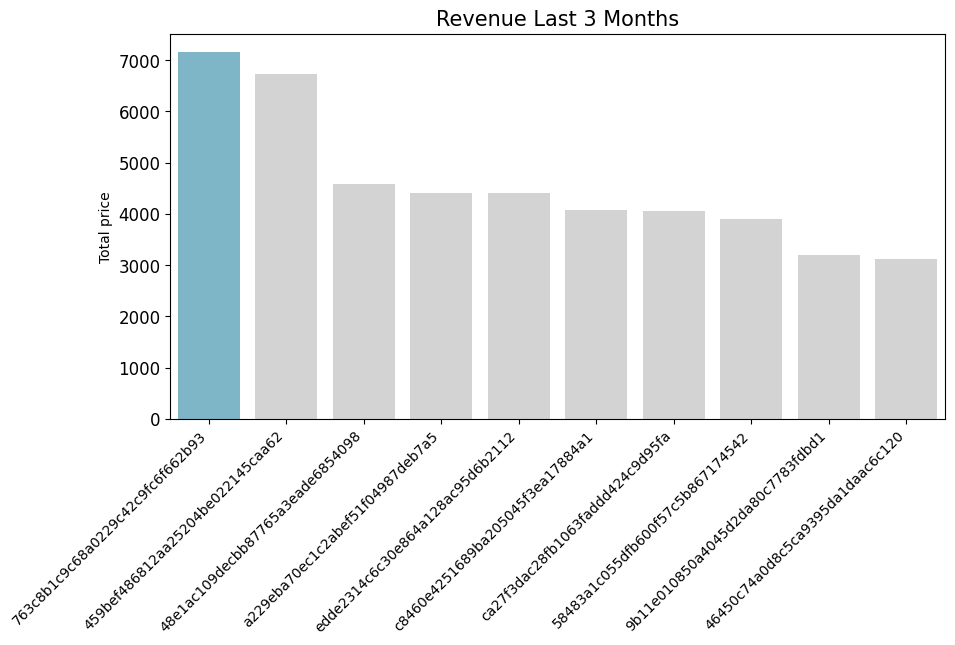

In [134]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 9  # Highlighting the top spender
sns.barplot(
    x="customer_unique_id",
    y="price",
    data=recent_revenue.head(10),
    palette=colors_)

plt.title("Revenue Last 3 Months", loc="center", fontsize=15)
plt.ylabel("Total price")
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana demografi dari pelanggan?

In [135]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"

}, inplace=True)
bycity = bycity_df.sort_values(by="customer_count", ascending=False).head(8)

C:\Users\RADEN DIKA.N\AppData\Local\Temp\ipykernel_20664\2138875341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


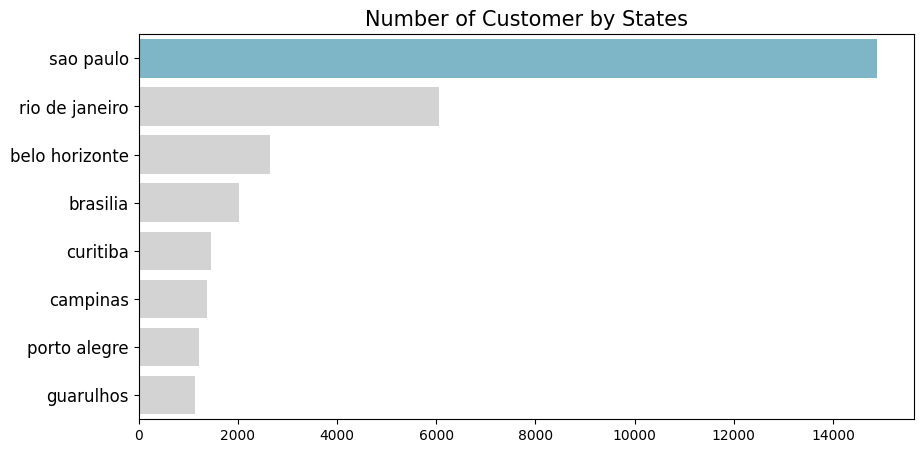

In [136]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=bycity.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Untuk memvisualisasikan data yang telah diolah yaitu dengan menggunakan seaborn, matplotlib.
- Menampilkan hasil pengolahan dan analisis data ke dalam bentuk visual sesuai dengan pertanyaan bisnis yang telah dirancang.
- Beberapa data telah diolah pada tahap EDA, sehingga pada tahap visualization/Explanatory hanya menampilkan visual seperti misalnya penjualan terbaik berdasarkan nama kategori produk.
- Visualisasi rata - rata pengiriman atau delivery_time dibagi menjadi 3 line dengan masing masing ciri khas seperti misalnya untuk membedakan tahun, tujuannya yaitu untuk memudahkan pembacaan data secara visual agar tidak terjadi kesalahpahaman. Dalam grafik juga diberikan legenda sebagai penjelasan dari masing masing line yang ditampilkan.
- Masing masing sumbu atau grafik diberikan penjelasan untuk memudahkan pembacaan grafik.

## Analisis Lanjutan (Opsional)

Tujuan Clustering ini adalah untuk mengetahui produk mana yang paling mahal hingga paling murah berdasarkan kategori harga. Sehingga diharapkan dapat memberikan insight terkait berapa banyak produk yang termasuk kategori mahal, murah, ataupun menengah.

In [137]:
def categorize_price(price):
    if price < 50:
        return "Murah"
    elif 50 <= price <= 200:
        return "Menengah"
    else:
        return "Mahal"

# Apply clustering
all_df["price_category"] = all_df["price"].apply(categorize_price)

In [138]:
price_distribution = all_df["price_category"].value_counts()

Text(0.5, 1.0, 'Distribusi Produk Berdasarkan Kategori Harga')

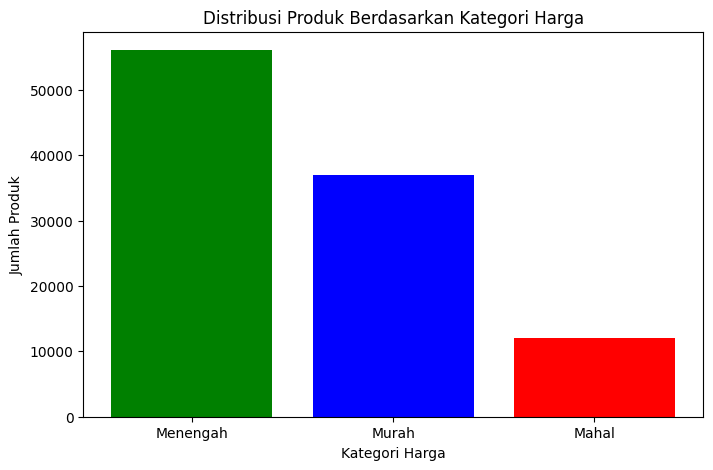

In [139]:
plt.figure(figsize=(8, 5))
plt.bar(price_distribution.index, price_distribution.values, color=['green', 'blue', 'red'])
plt.xlabel("Kategori Harga")
plt.ylabel("Jumlah Produk")
plt.title("Distribusi Produk Berdasarkan Kategori Harga")

**Insight:**
- Dalam analisis lanjutan, disini menggunakan metode clustering untuk mengetahui produk dengan kelompok harga termahal, menengah, atau murah.
- Setiap kategori diberikan warna dengan tanda warna yang berbeda untuk menunjukkan ciri khas dari masing masing kelompok berdasarkan ketentuannya.

## Conclusion

- Untuk melihat rata rata pengiriman berdasarkan tahun, hari, bulan dapat disimak dengan line chart dengan kategori yang telah dibedakan untuk memperjelas masing masing fungsi garis.
dapat diperhatikan bahwa pada 2016 mendapat penurunan drastis dari bulan november hingga desember, lalu pada tahun 2017 terjadi penurunan secara signifikan dari awal hingga september, dan pada tahun 2018 terjadi perubahan secara naik turun dan cenderung stabil dengan ditandai ada peningkatan pada performa pengiriman pada akhir tahun.

- Penjualan produk berdasarkan kategorinya pun dapat dilihat dengan menggunakan Bar Char dengan ditandai nama kategori produk moveis_decoraco merupakan produk dengan penjualan tertinggi dalam periode 2017-2018 dengan diikuti produk produk lainnya seperti cama_mesa_banho, ferramentas_jardim dan lainnya.

- Demografi penjualan produk berdasarkan kota juga dapat dilihat melalui bar chart dengan ditunjukkan kota sao paula merupakan kota dengan pelanggan terbanyak untuk seluruh transaksi diikuti dengan kota lain seperti rio de janeiro, belo horizonte dan kota lainnya.

- Pengeluaran yang dikeluarkan oleh pelanggan dapat dilihat melalui bar chart dengan data yang menunjukkan bahwa pengeluaran tertinggi selama periode 3 bulan terakhir mencapai angka lebih dari 7000 berdasarkan customer.

- Dalam analisis lanjutan juga dikelompokkan beberapa produk dengan kategori barang mahal, menengah, dan murah dengan diberikan visualisasi dari range jumlah produk antara masing masing kategori.

In [140]:
all_df.to_csv("all_data.csv", index=False)